In [1]:
# ctrl+/ -> multi line comments

import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# choose inputs here to view different data sets
path1 = "/Users/etmu9498/Desktop/research/CRL_data/2021"
path2 = "/Users/etmu9498/Desktop/research/CRL_data/2021_Sam"

# change paths to look at the folder with data
os.chdir( path1)

nc_data1 = []
for (dirpath, dirnames, filenames) in os.walk( path1):
    nc_data1.extend(filenames)
    break
    
# print(nc_data)
print("\n".join( nc_data1) + "\n\n")

os.chdir( path1)
nc_data2 = []
for (dirpath, dirnames, filenames) in os.walk( path2):
    nc_data2.extend(filenames)
    break
    
# print(nc_data)
print("\n".join( nc_data2))

# print( nc_data1[-1])

P3_20210811H1_200000-224759.cdf
P3_20210812H1_095513-125927.cdf
P3_20210812H2_212248-235510.cdf
P3_20210813H1_091801-113558.cdf
P3_20210816H1_085245-123459.cdf
P3_20210816H1_090000-102359.cdf
P3_20210817H1_094204-132058.cdf
P3_20210818H1_211425-244159.cdf
P3_20210819H1_213003-244159.cdf
P3_20210820H1_212402-245958.cdf
P3_20210821H2_213903-225658.cdf
P3_20210821H2_213903-262058.cdf
P3_20210827H1_203112-275220.cdf
P3_20210828H1_200115-221321.cdf
P3_20210829H1_171201-223719.cdf
P3_20210925H1_211201-243558.cdf
P3_20210926H1_220900-255058.cdf
P3_20210927H1_213003-253558.cdf
P3_20210929H2_211201-261159.cdf


P3_20210829H1_171201-223719.cdf
P3_20210925H1_211201-243558.cdf
P3_20210926H1_220900-255058.cdf
P3_20210927H1_213003-253558.cdf


In [3]:
# change paths to look at the folder with data
os.chdir( path1)
crl_data = xr.open_dataset( nc_data1[ -1])

os.chdir( path2)
crl_data_2 = xr.open_dataset( nc_data2[0])

# crl_data

In [4]:
# find the highest altitude and use that as the max y height

# alt_in = inbound_data.variables['altitude']
# max_alt_in = alt_in.max().values

# alt_out = outbound_data.variables['altitude']
# max_alt_out = alt_out.max().values

# time changes as an X variable
# print( len( crl_data_2.T[ :, 0]))
# print( len( crl_data_2.time))

# height changes as a Y variable
# print( len( crl_data_2.T[ 0, :]))
# print( len( crl_data_2.H))

# print( crl_data.T[ 0, :].values )

# change all incorrectly large values (T = 999 C) to nans
# crl_data_test = crl_data.T.where( crl_data.T.values < 50 )

print( crl_data.time[0].values)
print( crl_data_2.time[-1].values)

21.2004
22.6221


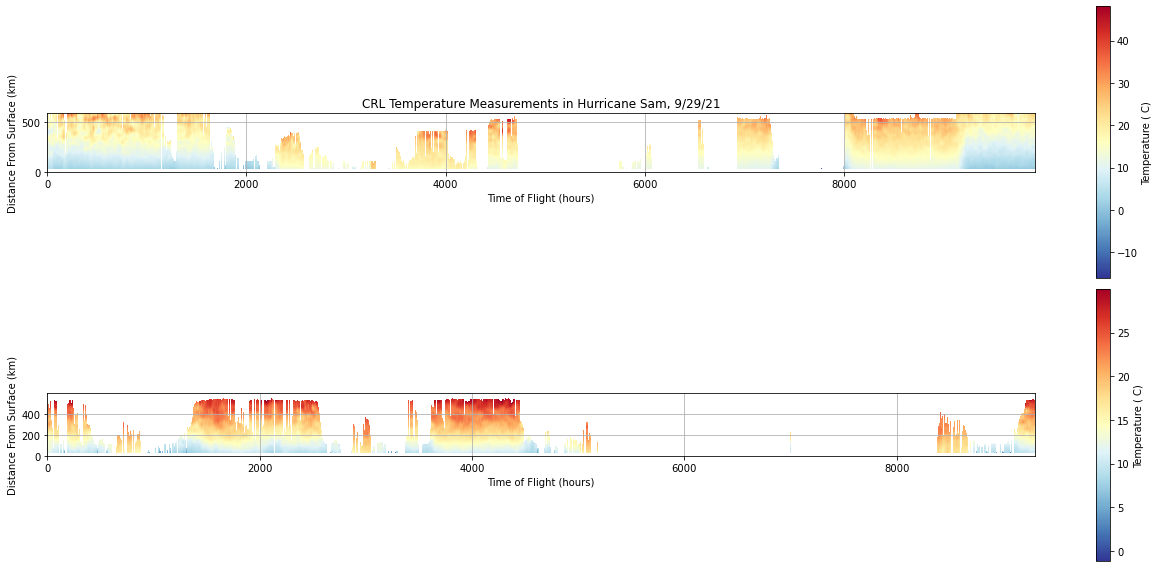

In [21]:
# fig = plt.figure( figsize=(18, 4))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

fig, ax = plt.subplots(2, 1, figsize=( 18, 8))

z0 = crl_data_2.T.where( crl_data_2.T.values < 50).transpose()

ax[0].pcolormesh( crl_data_2.time, - crl_data_2.H, z0, cmap = color_map ) 
ax[0].set_title( 'CRL Temperature Measurements in Hurricane Sam, 9/29/21')
ax[0].set_ylabel( 'Distance From Surface (km)')
ax[0].set_xlabel( 'Time of Flight (hours)')
# plt.xlim( [21, 26.25 ])
ax[0].grid( 'on')

# ax[0] = plt.gca()
# ax[0].set_facecolor('k')

z1 = crl_data.T.where( crl_data.T.values < 30).transpose()

ax[1].pcolormesh( crl_data.time, - crl_data.H, z1 , cmap = color_map )
# ax[1].set_title( 'CRL Temperature Measurements in Hurricane Sam, 9/29/21')
ax[1].set_ylabel( 'Distance From Surface (km)')
ax[1].set_xlabel( 'Time of Flight (hours)')
# plt.xlim( [21, 26.25 ])
ax[1].grid( 'on')

# ax[1] = plt.gca()
# ax[1].set_facecolor('k')

im0 = ax[0].imshow( z0, interpolation='nearest', origin='lower', cmap=color_map)
im1 = ax[1].imshow( z1, interpolation='nearest', origin='lower', cmap=color_map)

fig.colorbar( im0, ax = ax[0], label="Temperature ( C)")
fig.colorbar( im1, ax = ax[1], label="Temperature ( C)")

fig.tight_layout()
plt.show()
